## __Business Objective__ 
### Predict the Reliance Industries Stock Price for the next 30 days.
### There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2022 for Reliance Industries stock.
Prepare rules for the all the data sets  
1) Split the last year into a test set- to build a model to predict stock price.
2) Find short term, & long term trends.
3) Understand how it is impacted from external factors or any big external events.
4) Forecast for next 30 days.

### Data Collection
- We collected data from Business Standard website
- https://www.business-standard.com/company/reliance-industr-476/price-history/1

## EDA

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading and storing the data into a variable
df = pd.read_csv('data/Reliance_Stock_Prices.csv')

In [3]:
df.head(10)

,Date,Open,Close,Low,High
0,01/01/2015,438.57,439.84,437.93,441.87
1,02/01/2015,440.21,438.62,437.83,443.78
2,05/01/2015,438.60,434.41,433.52,441.25
3,06/01/2015,431.89,414.11,412.13,431.89
4,07/01/2015,415.40,423.67,414.65,425.35
5,08/01/2015,425.87,417.45,416.88,427.41
6,09/01/2015,419.09,426.17,418.57,427.18
7,12/01/2015,427.18,421.26,417.20,427.43
8,13/01/2015,422.35,417.55,416.36,423.20
9,14/01/2015,417.57,413.59,411.63,419.46


#### Copy data into another variable

In [4]:
df2 = df.copy()

In [5]:
df2.head()

,Date,Open,Close,Low,High
0,01/01/2015,438.57,439.84,437.93,441.87
1,02/01/2015,440.21,438.62,437.83,443.78
2,05/01/2015,438.60,434.41,433.52,441.25
3,06/01/2015,431.89,414.11,412.13,431.89
4,07/01/2015,415.40,423.67,414.65,425.35


### Data Cleaning

In [6]:
#checking the null values in our data
df.isnull().sum()

Date     0
Open     0
Close    0
Low      0
High     0
dtype: int64

### Descriptive Statistics

In [7]:
#describe about our data
df.describe()

,Open,Close,Low,High
count,1978.000000,1978.000000,1978.000000,1978.000000
mean,1312.124272,1310.663716,1296.234307,1326.662401
std,750.331273,749.428528,741.214118,758.389274
min,404.150000,401.350000,394.620000,405.140000
25%,529.282500,530.770000,524.602500,535.955000
50%,1167.855000,1168.500000,1151.140000,1185.710000
75%,2031.000000,2028.112500,2000.850000,2060.112500
max,2855.000000,2819.200000,2786.300000,2855.000000


In [8]:
df.shape

(1978, 5)

In [9]:
#information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1978 non-null   object 
 1   Open    1978 non-null   float64
 2   Close   1978 non-null   float64
 3   Low     1978 non-null   float64
 4   High    1978 non-null   float64
dtypes: float64(4), object(1)
memory usage: 77.4+ KB


In [10]:
#converting the Date cloumn into Datetime format
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1978 non-null   datetime64[ns]
 1   Open    1978 non-null   float64       
 2   Close   1978 non-null   float64       
 3   Low     1978 non-null   float64       
 4   High    1978 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 77.4 KB


In [12]:
df.head(10)

,Date,Open,Close,Low,High
0,2015-01-01,438.57,439.84,437.93,441.87
1,2015-01-02,440.21,438.62,437.83,443.78
2,2015-01-05,438.60,434.41,433.52,441.25
3,2015-01-06,431.89,414.11,412.13,431.89
4,2015-01-07,415.40,423.67,414.65,425.35
5,2015-01-08,425.87,417.45,416.88,427.41
6,2015-01-09,419.09,426.17,418.57,427.18
7,2015-01-12,427.18,421.26,417.20,427.43
8,2015-01-13,422.35,417.55,416.36,423.20
9,2015-01-14,417.57,413.59,411.63,419.46


In [13]:
#set Date columns as index
df=df.set_index('Date')
df

,Open,Close,Low,High
Date,,,,
2015-01-01,438.57,439.84,437.93,441.87
2015-01-02,440.21,438.62,437.83,443.78
2015-01-05,438.60,434.41,433.52,441.25
2015-01-06,431.89,414.11,412.13,431.89
2015-01-07,415.40,423.67,414.65,425.35
...,...,...,...,...
2022-12-26,2513.70,2524.50,2493.95,2542.05
2022-12-27,2529.00,2545.05,2514.35,2548.80
2022-12-28,2535.90,2544.45,2521.25,2549.90


### Data Visualization

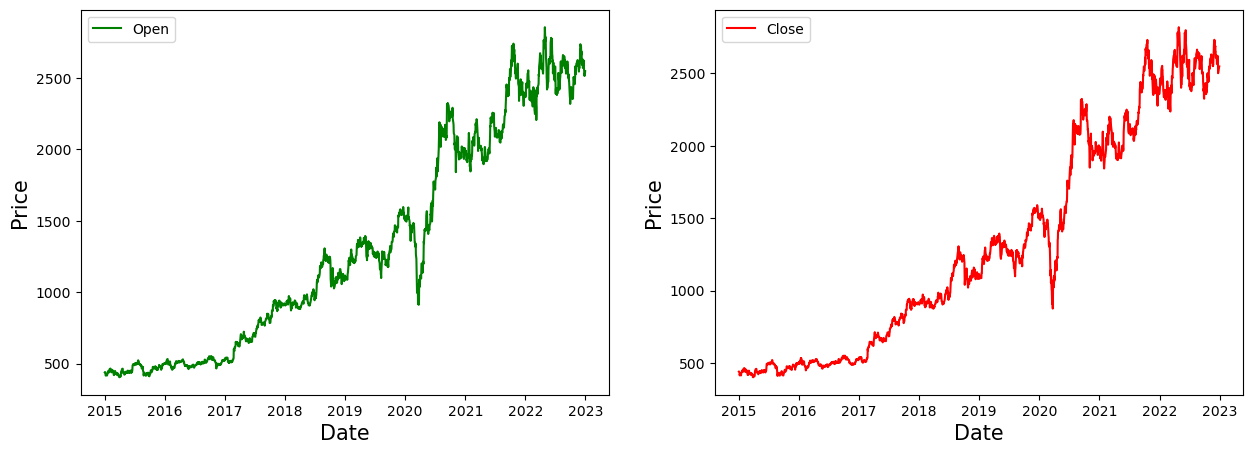

In [14]:
fg, ax =plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fg.show()

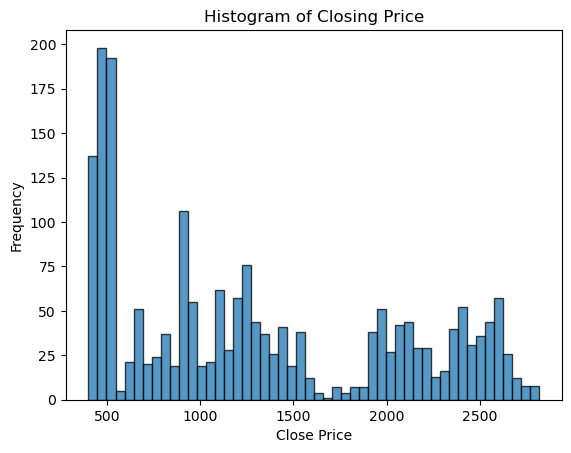

In [15]:
#ploting histogram of the closing price 
plt.hist(df['Close'], bins=50, edgecolor='black', alpha=0.75)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Price')
plt.show()

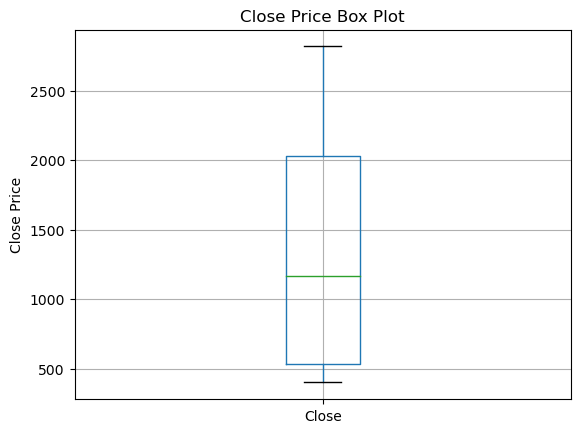

In [16]:
# to find outliers in  our data we have to plot the box plot
df.boxplot(column=["Close"])
plt.ylabel("Close Price")
plt.title("Close Price Box Plot")
plt.show()

- by this box plot we can say that there is not outliers are present in the data set

### Correlation Analysis

In [17]:
correlation = df.corr()
correlation

,Open,Close,Low,High
Open,1.000000,0.999442,0.999720,0.999741
Close,0.999442,1.000000,0.999773,0.999792
Low,0.999720,0.999773,1.000000,0.999674
High,0.999741,0.999792,0.999674,1.000000


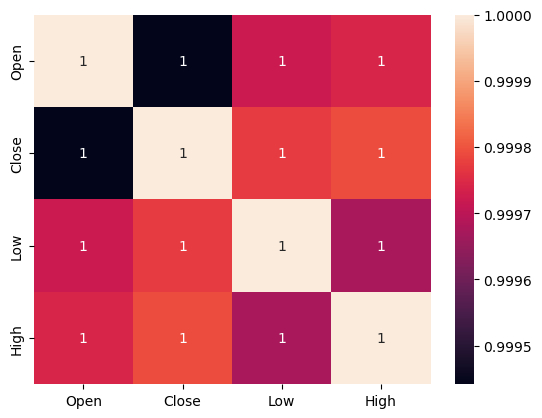

In [18]:
sns.heatmap(correlation, annot=True)
plt.show()

### Volatility Analysis

In [19]:
df['Returns'] = df['Close'].pct_change()
volatility = df['Returns'].std()

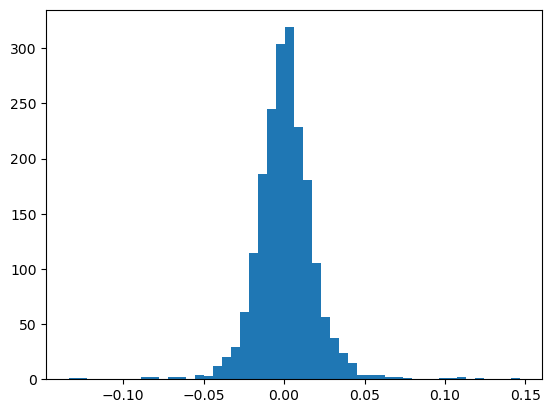

In [20]:
plt.hist(df['Returns'], bins=50)
plt.show()

- By this graph we can say that our most of the data lies in the middle.
- So we can say that our data create a normal distribution